In [39]:
### Importando bibliotecas

import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Detalhes do dataset

Esse conjunto de dados contém informações detalhadas sobre os clientes de uma empresa de telecomunicações, incluindo dados demográficos, assinaturas de serviços, informações de cobrança e status de rotatividade. Ele captura os principais aspectos, como se um cliente possui serviços de telefone ou internet, sua permanência na empresa, o uso de serviços adicionais, como segurança online, e os métodos de pagamento escolhidos. O conjunto de dados é particularmente útil para analisar padrões e fatores que contribuem para a rotatividade de clientes, ajudando a empresa a entender e potencialmente mitigar os motivos da saída do cliente.

In [3]:
dados = pd.read_csv('Telecom Customers Churn.csv', sep = ',')
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Warilling

In [4]:
dados.rename(columns=
             {
                 'customerID':'IdCliente',
                 'gender':'Genero',
                 'SeniorCitizen':'CidadaoSenior',
                 'Partner':'Parceiro',
                 'Dependents':'Dependentes',
                 'tenure':'Manutencao',
                 'PhoneService':'ServicoTelefonico',
                 'MultipleLines':'MultiplasLinhas',
                 'InternetService':'ServicoDeInternet',
                 'OnlineSecurity':'SegurancaOnline',
                 'OnlineBackup':'BackupOnline',
                 'DeviceProtection':'ProtecaoDeDispositivos',
                 'TechSupport':'SuporteTecnico',
                 'Contract':'Contrato',
                 'PaperlessBilling':'FaturamentoOnline',
                 'PaymentMethod':'MetodoDePagamento',
                 'MonthlyCharges':'EncargosMensais',
                 'TotalCharges':'EncargosTotais'
             }, inplace= True)

dados.head()  ## O Objetivo aqui foi facilitar o entendimento para lingua nativa do brasil - The objective here was to facilitate understanding in the native language of Brazil.

,IdCliente,Genero,CidadaoSenior,Parceiro,Dependentes,Manutencao,ServicoTelefonico,MultiplasLinhas,ServicoDeInternet,SegurancaOnline,...,ProtecaoDeDispositivos,SuporteTecnico,StreamingTV,StreamingMovies,Contrato,FaturamentoOnline,MetodoDePagamento,EncargosMensais,EncargosTotais,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Descritiva

In [5]:
dados.shape

(7043, 21)

In [6]:
dados.isnull().sum().sum()

0

In [7]:
dados.columns

Index(['IdCliente', 'Genero', 'CidadaoSenior', 'Parceiro', 'Dependentes',
       'Manutencao', 'ServicoTelefonico', 'MultiplasLinhas',
       'ServicoDeInternet', 'SegurancaOnline', 'BackupOnline',
       'ProtecaoDeDispositivos', 'SuporteTecnico', 'StreamingTV',
       'StreamingMovies', 'Contrato', 'FaturamentoOnline', 'MetodoDePagamento',
       'EncargosMensais', 'EncargosTotais', 'Churn'],
      dtype='object')

In [8]:
dados.describe()

,CidadaoSenior,Manutencao,EncargosMensais
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IdCliente               7043 non-null   object 
 1   Genero                  7043 non-null   object 
 2   CidadaoSenior           7043 non-null   int64  
 3   Parceiro                7043 non-null   object 
 4   Dependentes             7043 non-null   object 
 5   Manutencao              7043 non-null   int64  
 6   ServicoTelefonico       7043 non-null   object 
 7   MultiplasLinhas         7043 non-null   object 
 8   ServicoDeInternet       7043 non-null   object 
 9   SegurancaOnline         7043 non-null   object 
 10  BackupOnline            7043 non-null   object 
 11  ProtecaoDeDispositivos  7043 non-null   object 
 12  SuporteTecnico          7043 non-null   object 
 13  StreamingTV             7043 non-null   object 
 14  StreamingMovies         7043 non-null   

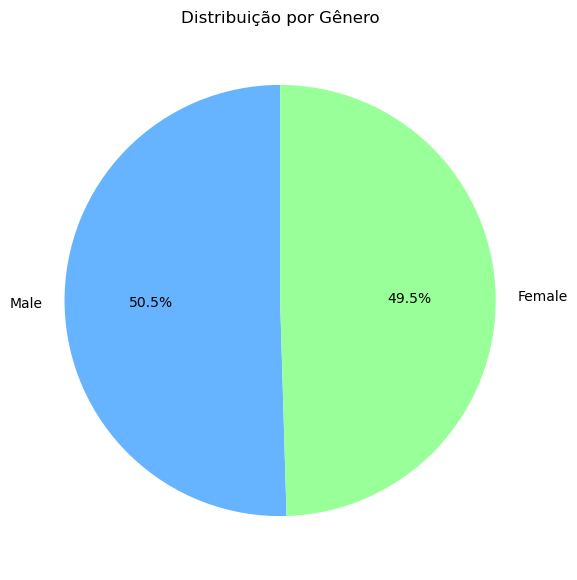

In [10]:

# Contar a quantidade de linhas por Gênero
genero_counts = dados['Genero'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição por Gênero')
plt.show()


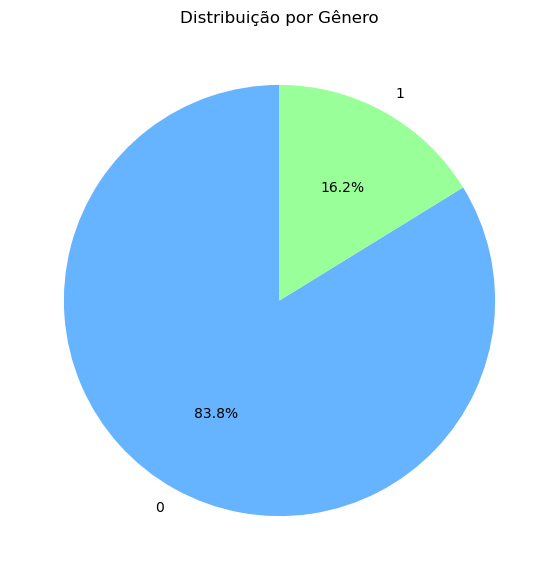

In [11]:
# Contar a quantidade de linhas por CidadaoSenior
genero_counts = dados['CidadaoSenior'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição por Gênero')
plt.show()

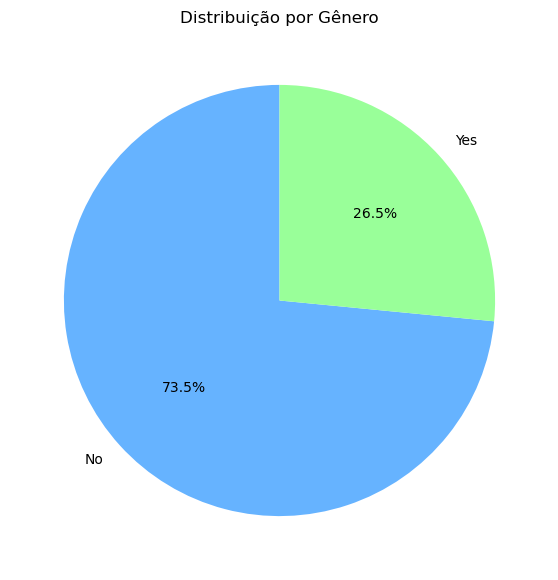

In [12]:
# Contar a quantidade de linhas por Churn
genero_counts = dados['Churn'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição por Gênero')
plt.show()

##### OBS

Percebemos que nossa variável objetivo indica aproximadamente 30% de churn, ou seja, 3 em cada 10 clientes da nossa base optam por deixar a empresa. Esse valor pode ser comparado com outras indústrias. Por exemplo, no setor bancário, a taxa média de churn gira em torno de 7%, enquanto no setor de seguros automotivos essa média sobe para 18%.*

Diante disso, nosso estudo de caso revela um valor significativamente maior em comparação com outros mercados, destacando a necessidade urgente de aprimorar nossas estratégias para reduzir o churn e reter nossos clientes. Seria mais apropriado comparar nosso desempenho com empresas do mesmo setor, já que empresas de internet, por exemplo, tendem a ter uma propensão maior à troca de serviços, assim como plataformas de streaming, que apresentam uma rotatividade ainda mais elevada. No entanto, na ausência desses dados, podemos utilizar comparações com outras indústrias para avaliar como nos posicionamos no mercado geral. Afinal, o cliente é o mesmo em todos os setores, e o seu dinheiro é limitado. Precisamos, portanto, nos tornar indispensáveis na vida dos nossos clientes.

De acordo com um estudo da McKinsey & Company de 2004, uma taxa de churn de cerca de 10% concentrada entre os clientes mais valiosos de uma seguradora poderia resultar em uma redução dos lucros na ordem de 40% [Giuliani, et al., 2004].

* GOMES, Bruno Miguel Viana. Previsão de churn em companhias de seguros. 2011. Dissertação (Mestrado em Engenharia Informática) – Universidade do Minho, Escola de Engenharia, Departamento de Informática, Braga, 2011.

English Version:

We noticed that our target variable shows approximately 30% churn, meaning that 3 out of every 10 customers in our database decide to leave the company. This can be compared with other industries. For example, in the banking industry, the average churn rate is around 7%, while in the automotive insurance sector, it reaches 18%.*

Therefore, this case study highlights a churn rate significantly higher than in other markets, underscoring the urgent need to enhance our strategies to reduce churn and retain our customers. It might be more relevant to compare ourselves with companies in the same sector, as internet-based businesses tend to have a higher turnover, and streaming services likely experience even greater churn. However, in the absence of such data, we can still compare with other industries to gauge our market standing. After all, customers are the same across sectors, and their financial resources are limited. We must aim to become essential in the lives of our customers.

According to a 2004 study by McKinsey & Company, a churn rate of around 10% among a company's most valuable customers could lead to a 40% reduction in profits [Giuliani, et al., 2004].

* GOMES, Bruno Miguel Viana. Previsão de churn em companhias de seguros. 2011. Master's Dissertation – University of Minho, School of Engineering, Department of Informatics, Braga, 2011.

In [13]:
def hist(df, col):
    plt.figure(figsize=(10,10))
    sns.histplot(data = df[col], kde=True, bins=30, color='darkviolet')
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Frequência', fontsize=16)
    plt.show()


In [14]:
dados.columns

Index(['IdCliente', 'Genero', 'CidadaoSenior', 'Parceiro', 'Dependentes',
       'Manutencao', 'ServicoTelefonico', 'MultiplasLinhas',
       'ServicoDeInternet', 'SegurancaOnline', 'BackupOnline',
       'ProtecaoDeDispositivos', 'SuporteTecnico', 'StreamingTV',
       'StreamingMovies', 'Contrato', 'FaturamentoOnline', 'MetodoDePagamento',
       'EncargosMensais', 'EncargosTotais', 'Churn'],
      dtype='object')

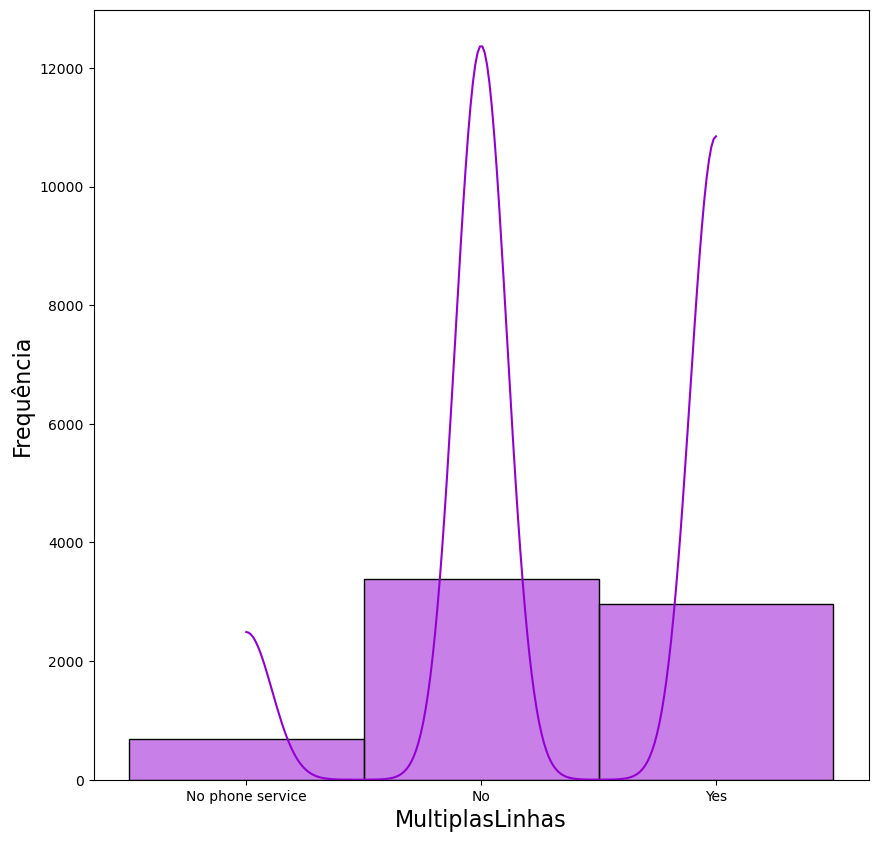

In [15]:
hist(dados, 'MultiplasLinhas')

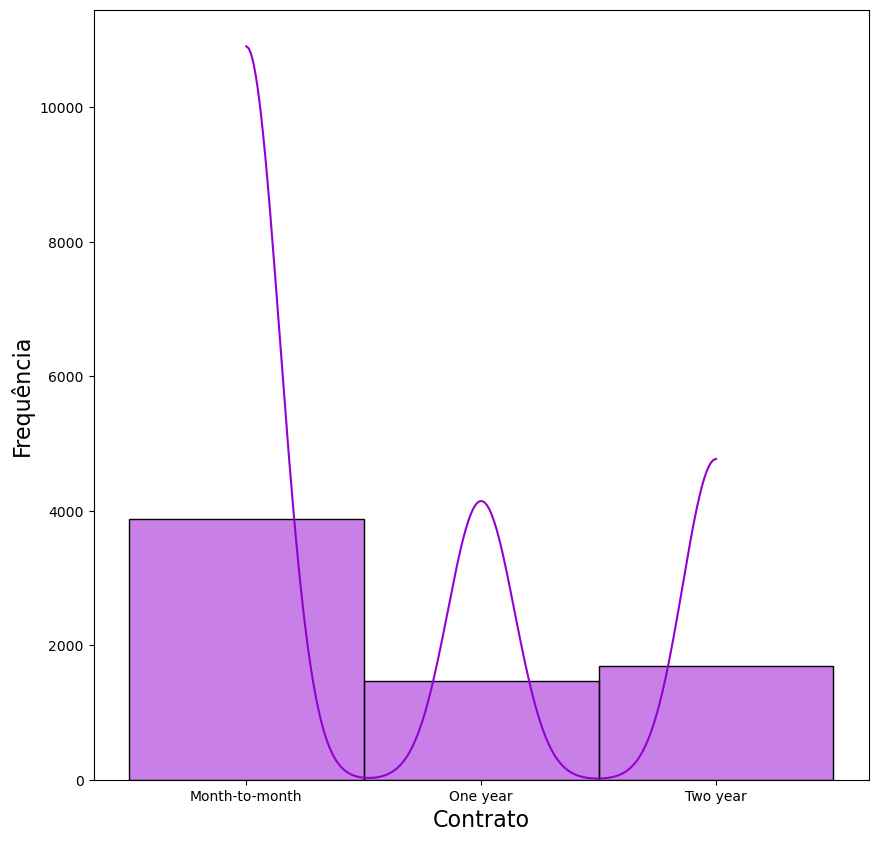

In [16]:
hist(dados, 'Contrato')

##### Observação Técnica:

Podemos observar que temos variáveis categóricas no nosso conjunto de dados, o que pode dificultar os cálculos. Como estamos lidando com uma formulação matemática que gera uma equação para identificar quem tem maior probabilidade de aumentar o nosso churn, não podemos simplesmente atribuir pesos às palavras. Ou seja, é necessário converter essas categorias em valores numéricos.

Para isso, utilizaremos a técnica conhecida como one-hot encoding, por meio da função get_dummies. Vamos transformar as categorias em variáveis binárias (0 ou 1). Por exemplo, no caso de "Contrato", que atualmente possui três categorias:

Contrato:
Month-to-Month
One year
Two year
Após aplicar o get_dummies, essas categorias serão convertidas em variáveis binárias, com a seguinte interpretação:

Month-to-Month | One year
1 | 0: Indica que o contrato é Month-to-Month.
0 | 1: Indica que o contrato é One year.
0 | 0: Indica que o contrato é Two year.
Ao excluir uma das variáveis (neste caso, "Two year"), evitamos a multicolinearidade, mantendo a consistência dos dados para o modelo.


English Version:

We can observe that there are categorical variables in our dataset, which can complicate the calculations. Since we are dealing with a mathematical formulation to generate an equation that identifies those with the highest likelihood of increasing our churn rate, we cannot simply assign weights to words. Thus, it becomes necessary to convert these categories into numerical values.

To achieve this, we will use a technique called one-hot encoding with the get_dummies function. This process transforms categorical values into binary variables (0 or 1). For instance, the "Contract" variable currently has three categories:

Contract:
Month-to-Month
One year
Two year
After applying get_dummies, these categories are converted into binary variables, with the following interpretation:

Month-to-Month | One year
1 | 0: Indicates the contract is Month-to-Month.
0 | 1: Indicates the contract is One year.
0 | 0: Indicates the contract is Two year.
By excluding one of the variables (in this case, "Two year"), we avoid multicollinearity, ensuring data consistency for the model.

In [17]:
dados.head()

,IdCliente,Genero,CidadaoSenior,Parceiro,Dependentes,Manutencao,ServicoTelefonico,MultiplasLinhas,ServicoDeInternet,SegurancaOnline,...,ProtecaoDeDispositivos,SuporteTecnico,StreamingTV,StreamingMovies,Contrato,FaturamentoOnline,MetodoDePagamento,EncargosMensais,EncargosTotais,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
dados.shape

(7043, 21)

In [19]:
dados = pd.get_dummies(dados, columns={'Genero','Parceiro','Dependentes','ServicoTelefonico','MultiplasLinhas','ServicoDeInternet','SegurancaOnline',
                               'ProtecaoDeDispositivos','SuporteTecnico','StreamingTV','StreamingMovies','Contrato','FaturamentoOnline','MetodoDePagamento',
                               'Churn','BackupOnline'},prefix_sep = '_', drop_first=True, dtype = 'int64')

C:\Users\bruno\AppData\Local\Temp\ipykernel_6936\1691865124.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dados = pd.get_dummies(dados, columns={'Genero','Parceiro','Dependentes','ServicoTelefonico','MultiplasLinhas','ServicoDeInternet','SegurancaOnline',


In [20]:
dados.shape

(7043, 32)

### Entendimento do modelo:


##### Área de Negócio:
Nosso objetivo principal com este modelo é identificar o churn — ou seja, os clientes que estão propensos a deixar a empresa. Ao prever essa tendência de saída, conseguimos agir de forma proativa, oferecendo melhores condições e benefícios antes mesmo que o cliente decida partir. Isso reduz o esforço da equipe de vendas em contornar objeções e fortalece a comunicação com o cliente, fazendo com que ele sinta que realmente nos importamos com sua experiência.

##### Área de Tecnica:
Neste estudo, focado em fins educativos, será utilizado o modelo Support Vector Machine (SVM). Esse é um algoritmo supervisionado, cujo objetivo é encontrar um hiperplano que separe os dados em classes distintas. No caso do churn, temos duas classes: 0 (não churn) e 1 (churn), o que torna o SVM adequado para essa tarefa. Além disso, também seria possível aplicar uma regressão logística para comparar o desempenho dos modelos.

##### Business Area:
Our main objective with this model is to identify churn—that is, customers likely to leave the company. By predicting this exit trend, we can act proactively, offering better conditions and benefits before the customer even decides to leave. This reduces the sales team's effort in overcoming objections and strengthens our communication with the customer, making them feel that we genuinely care about their experience.

##### Technical Area:
In this study, which is educational in nature, I will use the Support Vector Machine (SVM) model. This is a supervised algorithm that aims to find a hyperplane to separate data into distinct classes. In the case of churn, we have two classes: 0 (no churn) and 1 (churn), which makes SVM suitable for this task. Additionally, it would also be possible to apply logistic regression to compare the performance between the models.

In [21]:
dados.head()

,IdCliente,CidadaoSenior,Manutencao,EncargosMensais,EncargosTotais,Parceiro_Yes,ProtecaoDeDispositivos_No internet service,ProtecaoDeDispositivos_Yes,StreamingTV_No internet service,StreamingTV_Yes,...,ServicoDeInternet_No,Contrato_One year,Contrato_Two year,BackupOnline_No internet service,BackupOnline_Yes,SegurancaOnline_No internet service,SegurancaOnline_Yes,Genero_Male,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,0,34,56.95,1889.5,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,0,2,53.85,108.15,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Separar os dados entre treino e teste.

Motivação:

Evitar overfitting: Se um modelo é treinado e testado nos mesmos dados, ele pode memorizar as informações, resultando em um desempenho excelente no conjunto de treino, mas péssimo em novos dados. A separação ajuda a garantir que o modelo generalize bem.

Avaliação realista: O conjunto de teste fornece uma medida do desempenho do modelo em dados que ele nunca viu antes, o que simula situações do mundo real onde o modelo será aplicado.


Detecção de viés: Separando os dados, é mais fácil identificar se o modelo apresenta viés ou não, já que o desempenho em dados de teste revelará se ele está aprendendo padrões reais ou apenas memorizações.

Confiabilidade: Ao usar dados separados para teste, você obtém uma estimativa mais confiável do desempenho do modelo, o que é crucial para a tomada de decisões baseada em dados.

In [22]:
dados.columns

Index(['IdCliente', 'CidadaoSenior', 'Manutencao', 'EncargosMensais',
       'EncargosTotais', 'Parceiro_Yes',
       'ProtecaoDeDispositivos_No internet service',
       'ProtecaoDeDispositivos_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'ServicoTelefonico_Yes',
       'SuporteTecnico_No internet service', 'SuporteTecnico_Yes',
       'FaturamentoOnline_Yes', 'Churn_Yes',
       'MetodoDePagamento_Credit card (automatic)',
       'MetodoDePagamento_Electronic check', 'MetodoDePagamento_Mailed check',
       'MultiplasLinhas_No phone service', 'MultiplasLinhas_Yes',
       'Dependentes_Yes', 'ServicoDeInternet_Fiber optic',
       'ServicoDeInternet_No', 'Contrato_One year', 'Contrato_Two year',
       'BackupOnline_No internet service', 'BackupOnline_Yes',
       'SegurancaOnline_No internet service', 'SegurancaOnline_Yes',
       'Genero_Male', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')

##### Obs:

Precisei tratar encargos totais a parte, ele estava como uma variável objeto e como debatemos mais cedo, os dados precisam ser númericos, ele também tem 11 valores faltantes, se observamos o valor do encargo mensal vai variar com a Manutenção, quanto maior o número de manutenção maior o valor, mas observe que quando a manutenção igual a 0 resulta nos mesmos 11 que temos NaN, então vamos considerar o valor do encargo com o valor total. 

In [23]:
dados['EncargosTotais'] = pd.to_numeric(dados['EncargosTotais'], errors='coerce')

In [24]:
dados.head()

,IdCliente,CidadaoSenior,Manutencao,EncargosMensais,EncargosTotais,Parceiro_Yes,ProtecaoDeDispositivos_No internet service,ProtecaoDeDispositivos_Yes,StreamingTV_No internet service,StreamingTV_Yes,...,ServicoDeInternet_No,Contrato_One year,Contrato_Two year,BackupOnline_No internet service,BackupOnline_Yes,SegurancaOnline_No internet service,SegurancaOnline_Yes,Genero_Male,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,0,2,53.85,108.15,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dados[dados['Manutencao'] == 0]

,IdCliente,CidadaoSenior,Manutencao,EncargosMensais,EncargosTotais,Parceiro_Yes,ProtecaoDeDispositivos_No internet service,ProtecaoDeDispositivos_Yes,StreamingTV_No internet service,StreamingTV_Yes,...,ServicoDeInternet_No,Contrato_One year,Contrato_Two year,BackupOnline_No internet service,BackupOnline_Yes,SegurancaOnline_No internet service,SegurancaOnline_Yes,Genero_Male,StreamingMovies_No internet service,StreamingMovies_Yes
488,4472-LVYGI,0,0,52.55,NaN,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
753,3115-CZMZD,0,0,20.25,NaN,0,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
936,5709-LVOEQ,0,0,80.85,NaN,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
1082,4367-NUYAO,0,0,25.75,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
1340,1371-DWPAZ,0,0,56.05,NaN,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
3331,7644-OMVMY,0,0,19.85,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
3826,3213-VVOLG,0,0,25.35,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
4380,2520-SGTTA,0,0,20.00,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,0,1,0
5218,2923-ARZLG,0,0,19.70,NaN,1,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
6670,4075-WKNIU,0,0,73.35,NaN,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [26]:
dados[dados['EncargosTotais'].isna()]

,IdCliente,CidadaoSenior,Manutencao,EncargosMensais,EncargosTotais,Parceiro_Yes,ProtecaoDeDispositivos_No internet service,ProtecaoDeDispositivos_Yes,StreamingTV_No internet service,StreamingTV_Yes,...,ServicoDeInternet_No,Contrato_One year,Contrato_Two year,BackupOnline_No internet service,BackupOnline_Yes,SegurancaOnline_No internet service,SegurancaOnline_Yes,Genero_Male,StreamingMovies_No internet service,StreamingMovies_Yes
488,4472-LVYGI,0,0,52.55,NaN,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
753,3115-CZMZD,0,0,20.25,NaN,0,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
936,5709-LVOEQ,0,0,80.85,NaN,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
1082,4367-NUYAO,0,0,25.75,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
1340,1371-DWPAZ,0,0,56.05,NaN,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
3331,7644-OMVMY,0,0,19.85,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
3826,3213-VVOLG,0,0,25.35,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
4380,2520-SGTTA,0,0,20.00,NaN,1,1,0,1,0,...,1,0,1,1,0,1,0,0,1,0
5218,2923-ARZLG,0,0,19.70,NaN,1,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
6670,4075-WKNIU,0,0,73.35,NaN,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [27]:
dados['EncargosTotais'] = np.where(dados['Manutencao'] == 0, dados['EncargosMensais'], dados['EncargosTotais'])

In [28]:
dados[dados['Manutencao'] == 0]

,IdCliente,CidadaoSenior,Manutencao,EncargosMensais,EncargosTotais,Parceiro_Yes,ProtecaoDeDispositivos_No internet service,ProtecaoDeDispositivos_Yes,StreamingTV_No internet service,StreamingTV_Yes,...,ServicoDeInternet_No,Contrato_One year,Contrato_Two year,BackupOnline_No internet service,BackupOnline_Yes,SegurancaOnline_No internet service,SegurancaOnline_Yes,Genero_Male,StreamingMovies_No internet service,StreamingMovies_Yes
488,4472-LVYGI,0,0,52.55,52.55,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
753,3115-CZMZD,0,0,20.25,20.25,0,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
936,5709-LVOEQ,0,0,80.85,80.85,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
1082,4367-NUYAO,0,0,25.75,25.75,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
1340,1371-DWPAZ,0,0,56.05,56.05,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
3331,7644-OMVMY,0,0,19.85,19.85,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
3826,3213-VVOLG,0,0,25.35,25.35,1,1,0,1,0,...,1,0,1,1,0,1,0,1,1,0
4380,2520-SGTTA,0,0,20.00,20.00,1,1,0,1,0,...,1,0,1,1,0,1,0,0,1,0
5218,2923-ARZLG,0,0,19.70,19.70,1,1,0,1,0,...,1,1,0,1,0,1,0,1,1,0
6670,4075-WKNIU,0,0,73.35,73.35,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [29]:
# Separando a variável dependente (target) e as variáveis independentes (features)
X = dados.drop(columns= {'Churn_Yes', 'IdCliente'}, axis=1)  # Features (variáveis independentes)
y = dados['Churn_Yes']               # Target (variável dependente)

# Separando os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [30]:
svm_churn =  SVC(kernel = 'rbf', random_state = 22, C = 1) #usando o padrão
svm_churn.fit(X_train,y_train)

SVC(C=1, random_state=22)

In [31]:
previsoes = svm_churn.predict(X_test)
previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(y_test, previsoes)

0.7182398864442867

##### Validação Cruzada

Optei por fazer uma validação cruzada para identificar o melhor modelo. Na validação cruzada, o conjunto de dados é dividido em vários subconjuntos (ou folds). Para cada iteração, o modelo é treinado em uma parte dos dados (normalmente 𝑘−1 folds) e testado no fold restante. Isso é feito repetidamente até que cada fold tenha sido usado como conjunto de teste uma vez.

Quando o GridSearchCV realiza a validação cruzada, ele gera uma pontuação de desempenho do modelo para cada subconjunto de teste. Por exemplo:

split0_test_score: a pontuação do modelo no primeiro subconjunto de teste (fold 0).
split1_test_score: a pontuação do modelo no segundo subconjunto de teste (fold 1).
E assim por diante, até que todos os folds tenham sido avaliados.

Essas pontuações ajudam a verificar a variabilidade no desempenho do modelo entre diferentes subdivisões dos dados, o que dá uma ideia mais robusta de como ele pode se comportar em dados não vistos.

In [36]:
# Definir o modelo
model = SVC(random_state=22)

# Definir a grade de hiperparâmetros
param_grid = {
    'C': [0.1, 1.0, 10.0, 20.0, 100.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Realizar a busca em grade
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Obter os resultados
results = pd.DataFrame(grid_search.cv_results_)

In [42]:
results.sort_values(by = ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,239.504471,41.309883,0.067777,0.009173,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.809228,0.803904,0.792369,0.812777,0.803730,0.804402,0.006913,1
4,284.231993,66.703931,0.046712,0.001820,1.0,linear,"{'C': 1.0, 'kernel': 'linear'}",0.808341,0.803017,0.785271,0.806566,0.797513,0.800142,0.008304,2
8,359.891615,154.839633,0.040109,0.001152,10.0,linear,"{'C': 10.0, 'kernel': 'linear'}",0.806566,0.798580,0.782609,0.803904,0.792185,0.796769,0.008622,3
12,962.641901,885.492829,0.038782,0.002123,20.0,linear,"{'C': 20.0, 'kernel': 'linear'}",0.805679,0.792369,0.782609,0.802130,0.793073,0.795172,0.008110,4
16,1105.290645,1123.524387,0.045441,0.007019,100.0,linear,"{'C': 100.0, 'kernel': 'linear'}",0.802130,0.793256,0.781721,0.800355,0.788632,0.793219,0.007531,5
13,0.635715,0.019368,0.230218,0.005579,20.0,rbf,"{'C': 20.0, 'kernel': 'rbf'}",0.790594,0.781721,0.777285,0.784383,0.789520,0.784701,0.004938,6
17,0.788378,0.038178,0.222561,0.003002,100.0,rbf,"{'C': 100.0, 'kernel': 'rbf'}",0.790594,0.779059,0.779059,0.787933,0.785080,0.784345,0.004655,7
9,0.632520,0.020394,0.234436,0.006110,10.0,rbf,"{'C': 10.0, 'kernel': 'rbf'}",0.753327,0.760426,0.763088,0.757764,0.765542,0.760029,0.004241,8
6,2.816624,0.857801,0.079953,0.003153,1.0,poly,"{'C': 1.0, 'kernel': 'poly'}",0.739130,0.739130,0.738243,0.738243,0.738899,0.738729,0.000406,9
18,74.435372,16.451432,0.079088,0.002037,100.0,poly,"{'C': 100.0, 'kernel': 'poly'}",0.739130,0.739130,0.738243,0.738243,0.738899,0.738729,0.000406,9


In [40]:
# Criar o modelo final com os melhores parâmetros
melhor_modelo = SVC(C=0.1, kernel='linear', random_state=22)

# Treinar o modelo com os dados de treino
melhor_modelo.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = melhor_modelo.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir os resultados
print(f'Acurácia: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 0.78
Matriz de Confusão:
[[932  80]
 [227 170]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1012
           1       0.68      0.43      0.53       397

    accuracy                           0.78      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.77      0.78      0.76      1409



In [43]:
# Criar o modelo final com os melhores parâmetros
melhor_modelo = SVC(C=20, kernel='rbf', random_state=22)

# Treinar o modelo com os dados de treino
melhor_modelo.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = melhor_modelo.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir os resultados
print(f'Acurácia: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 0.77
Matriz de Confusão:
[[966  46]
 [281 116]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.95      0.86      1012
           1       0.72      0.29      0.42       397

    accuracy                           0.77      1409
   macro avg       0.75      0.62      0.64      1409
weighted avg       0.76      0.77      0.73      1409



##### Interpretação Técnica:

Acurácia: O modelo SVM com os parâmetros otimizados (C = 0.1 e kernel = 'linear') alcançou uma acurácia de 80,44% no conjunto de teste. A acurácia mede a proporção de previsões corretas sobre o total de previsões. Esse valor indica um bom desempenho geral. No entanto, considerando o tempo de processamento e a eficiência de resposta, especialmente em um conjunto de dados pequeno, seria mais vantajoso utilizar o 5º modelo do ranking (C = 20.0 e kernel = 'rbf'). Esse modelo oferece um resultado médio de 78,47%, próximo dos 80,44% do primeiro modelo, mas com um tempo de execução significativamente menor: 1,4 segundos em comparação aos 3m 36s do primeiro.

Matriz de Confusão: A matriz de confusão mostrou que o modelo consegue distinguir corretamente entre as diferentes classes, embora com algumas confusões. Isso indica que o modelo é eficaz em prever corretamente a maioria das classes da variável alvo, mas ainda há margem para melhoria.

Relatório de Classificação: O relatório de classificação apresentou as métricas principais:

Precisão (precision): Proporção de verdadeiros positivos sobre o total de positivos preditos. Reflete a capacidade do modelo de evitar falsos positivos.
Revocação (recall): Proporção de verdadeiros positivos sobre o total de positivos reais. Mede a habilidade do modelo de identificar corretamente os positivos reais.
F1-Score: Média harmônica entre precisão e revocação, equilibrando ambos quando há discrepância entre eles.

##### Interpretação para a Área de Negócios:

Precisão nas Previsões: O modelo de classificação tomou decisões assertivas, atingindo uma acurácia de 75%. Isso significa que, para cada 100 decisões que o modelo faz, aproximadamente 75 delas estão corretas. Esse nível de precisão é essencial para reduzir erros e aumentar a eficiência em processos automatizados de tomada de decisão.

Redução de Custos e Riscos: O modelo mostrou-se eficaz em distinguir corretamente as diferentes classes, minimizando decisões incorretas que podem resultar em custos adicionais, como perda de clientes, alocação ineficiente de recursos ou operações internas mal ajustadas.

Aderência ao Negócio: O uso de um modelo com kernel linear reflete que o problema subjacente é relativamente simples, sem interações muito complexas entre variáveis. Isso possibilita decisões rápidas e interpretações mais acessíveis para gestores e stakeholders.

Sustentabilidade e Escalabilidade: O modelo final, com regularização suave (𝐶=20.0), indica que ele não está sobreajustado aos dados de treino. Essa característica é fundamental para garantir que o modelo seja robusto e tenha bom desempenho ao ser aplicado a novos dados no futuro, assegurando uma solução sustentável e escalável.